# CLUSTERING ASSIGNMENT
## Countries needing AID

#### Problem Statement:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 
We need to categorise the countries using some socio-economic and health factors that determine the overall development of the country.


## Dataset characteristics
=========================================	

-country -	Name of the country

-child_mort	- Death of children under 5 years of age per 1000 live births

-exports	- Exports of goods and services per capita. Given as %age of the GDP per capita

-health	- Total health spending per capita. Given as %age of GDP per capita

-imports	- Imports of goods and services per capita. Given as %age of the GDP per capita

-Income	- Net income per person

-Inflation	- The measurement of the annual growth rate of the Total GDP

-life_expec	- The average number of years a new born child would live if the current mortality patterns are to remain the same

-total_fer	- The number of children that would be born to each woman if the current age-fertility rates remain the same.

-gdpp	- The GDP per capita. Calculated as the Total GDP divided by the total population.



In [6]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Read and Visualize the data

In [7]:
import datetime as dt

#Importing necessary libraries
import pandas as pd
import numpy as np

# For Visualising the graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For performing preprocessing step like scaling
import sklearn
from sklearn.preprocessing import StandardScaler

# For KMeans clustering 
from sklearn.cluster import KMeans
#For silhouette_score
from sklearn.metrics import silhouette_score

# For Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree


In [8]:
# read the dataset
country = pd.read_csv("C://SHUBHANGI//Machine Learning//Clustering Assignment//Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
# basics of the df
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
country.shape

(167, 10)

## Clean the data

In [11]:
# missing values
round(100*(country.isnull().sum())/len(country), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

Since no null value is present hence no action required

__Since Export, Health and Import is percentage of GDPP, we need to convert this to actual values__

In [12]:
country['exports'] = ((country['exports']*country['gdpp'])/100)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,6.03,58.9,19100,1.44,76.8,2.13,12200


In [13]:
# Similary needs to be done for imports and health
country['imports'] = ((country['imports']*country['gdpp'])/100)
country['health'] = ((country['health']*country['gdpp'])/100)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## EDA - Exploratory Data Analysis

### Let's analyse the data with the help of some EDA
### Checking all columns with distplot

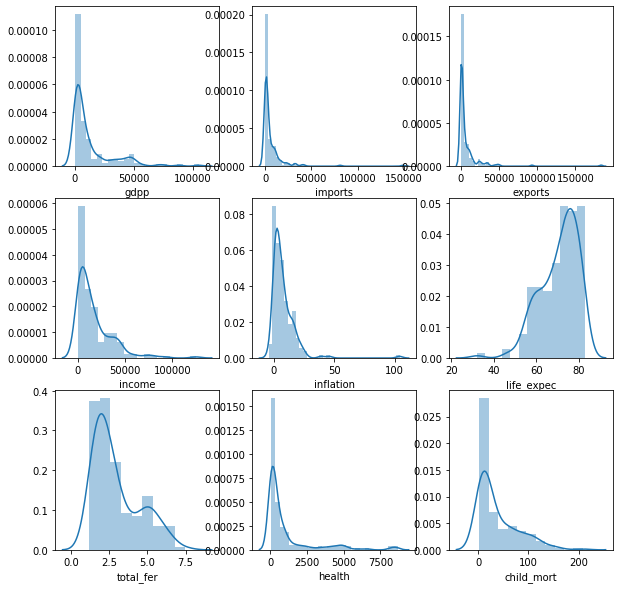

In [14]:
plt.figure(figsize = (10,10))
feature = ['gdpp', 'imports','exports','income', 'inflation','life_expec','total_fer', 'health', 'child_mort']
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(country[i[1]])

### Checking relationship between different columns and fin out which all columns are highly correlated

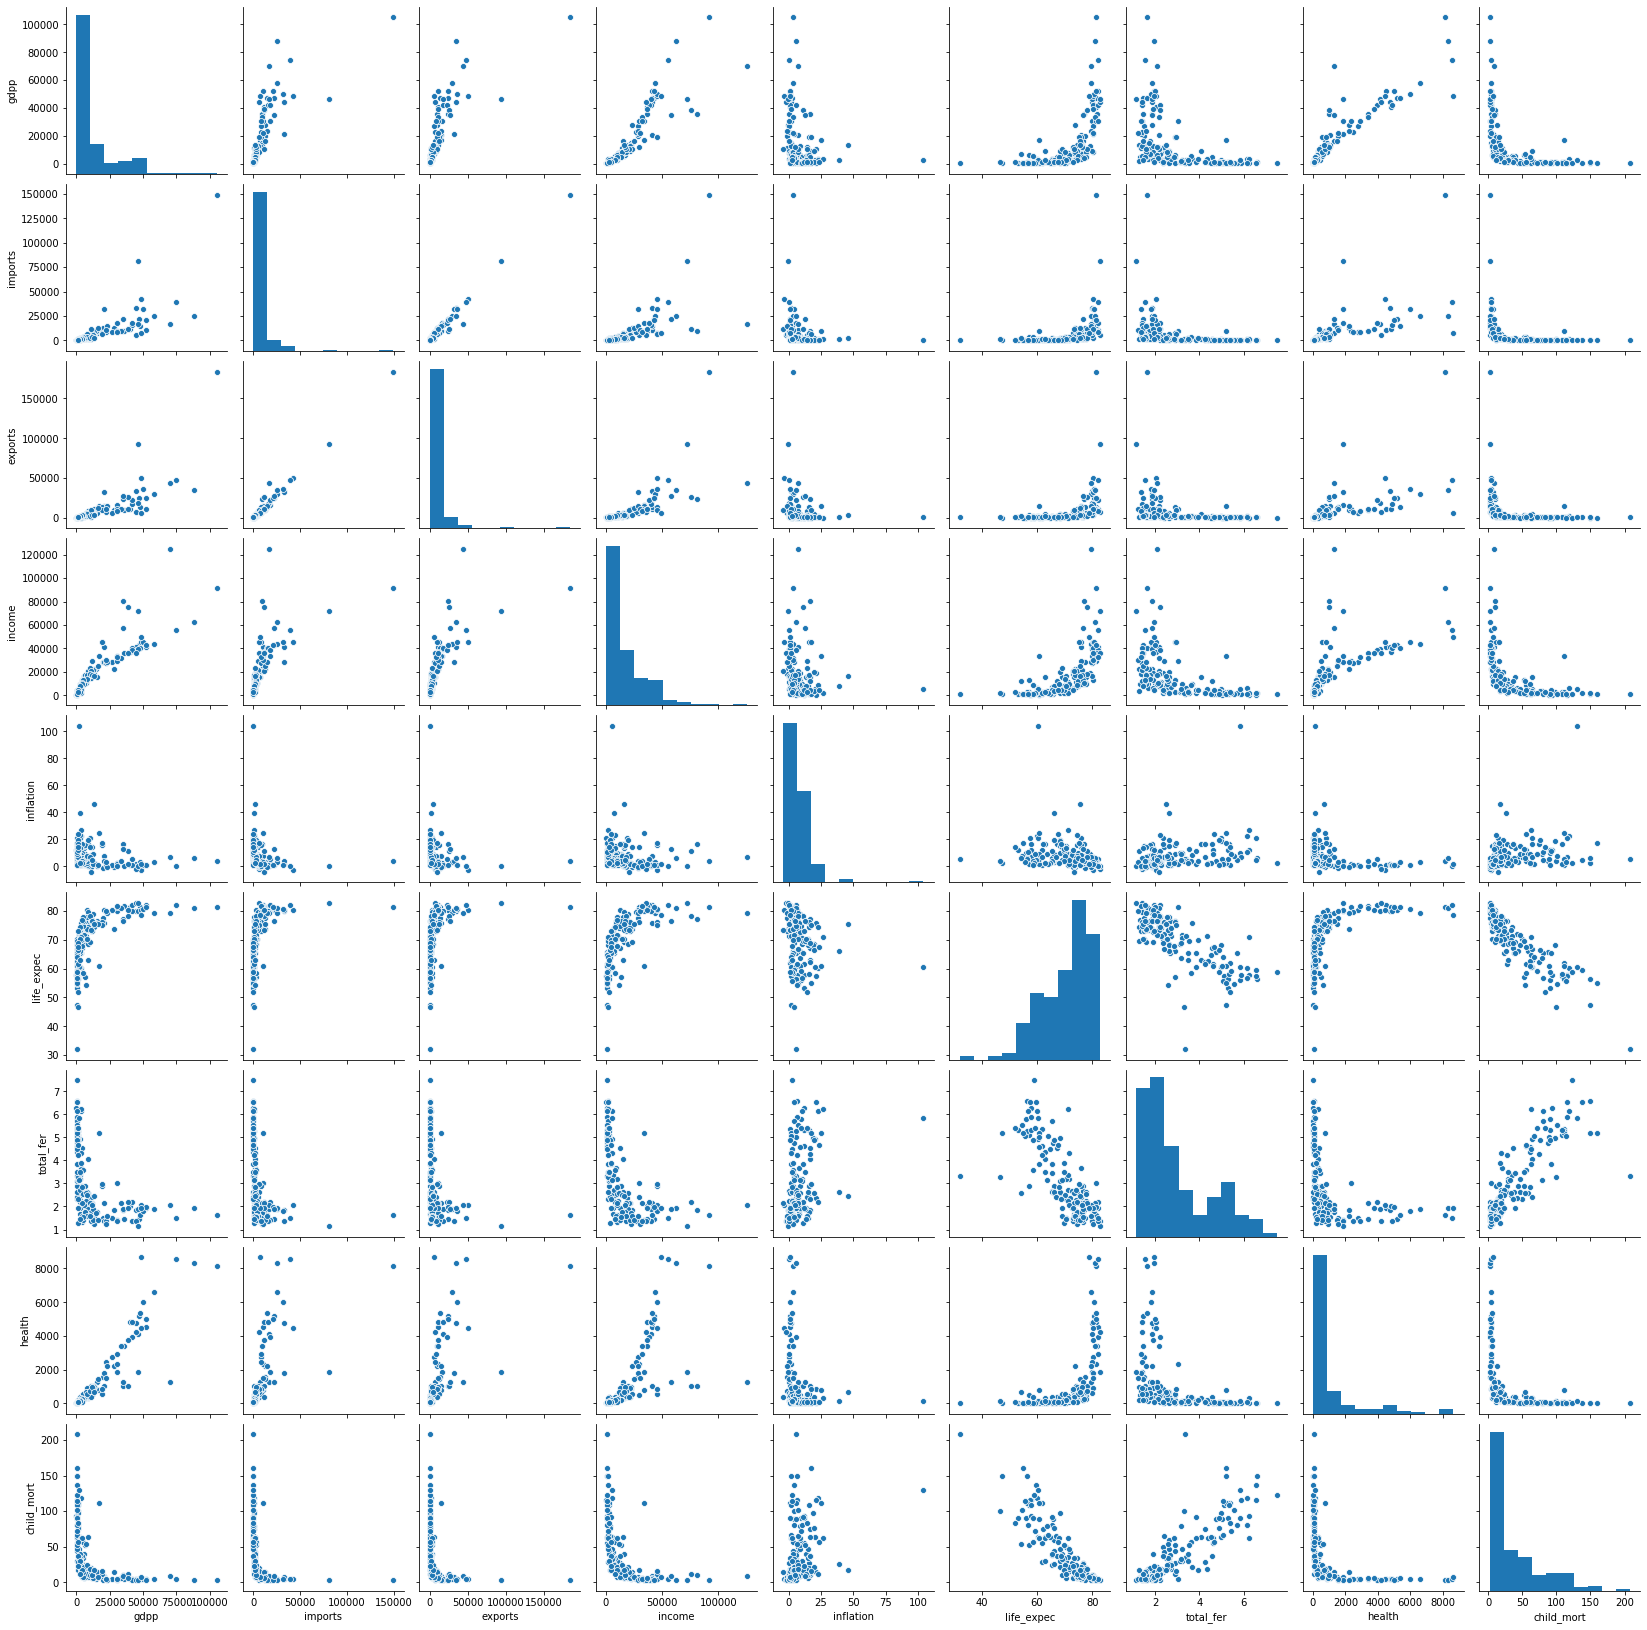

In [15]:
#plot the pair plot
sns.pairplot(data = country, vars = ['gdpp', 'imports','exports','income', 'inflation','life_expec','total_fer', 'health', 'child_mort'])
plt.show()

### Finding correlation, Lets check the corr matrix for the data just to gain more understanding about the data

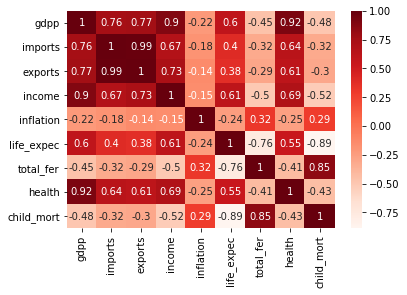

In [16]:
#plot the correlation matrix 
sns.heatmap(country[['gdpp', 'imports','exports','income', 'inflation','life_expec','total_fer', 'health', 'child_mort']].corr(), annot = True, cmap ='Reds')
plt.show()

We can conclude from above that -
- There is a strong correlation between child mortality, total fertility and life expectancy.However, life expectancy and child mortality are negatively correlated.
- Imports, exports and per capita income are also strongly correlated.
- Per capita health spending is strongly correlated with GDPP

## Treating Outliers

### As we know that clustering is affected by outliers it is important to check whether there are any outliers in the data

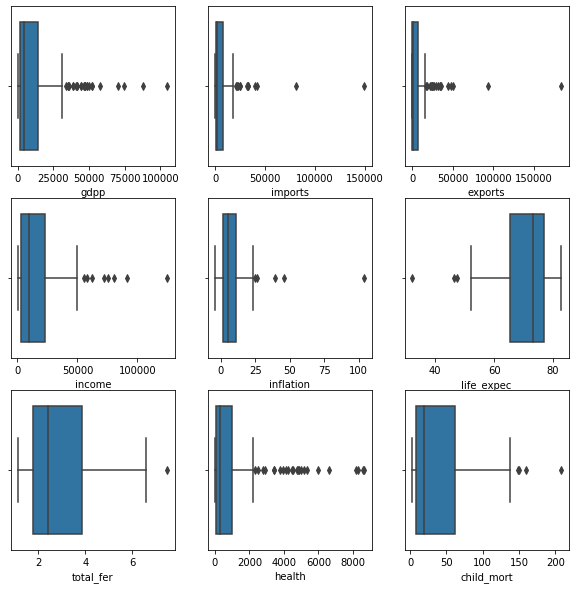

In [17]:
plt.figure(figsize = (10,10))
feature = ['gdpp', 'imports','exports','income', 'inflation','life_expec','total_fer', 'health', 'child_mort']
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(country[i[1]])

As we can see that there are outliers present in all the analysed variables and it is natural as there may be vast differecne in given indicators between the developed, developing and underdeveloped countries. Hence removing outliers altogether will lead to loss of valuable information and will lead to suboptimal clustering. So instead of removing lets select the countries with 95 percentlile for GDPP column

In this case study, we need to find out countries that are actually in need of AID and that can be decided by high child mortality and low value of income, health, total fertility, gdpp, exports and imports , thus we cannot treat high value of child mortality and low value for all other columns
- For all columns except, child mortality, we will treat only higher outliers and will refrain from treating lower values.
- For child mortality, we will treat only lower vaues and will refrain from treating higher values.

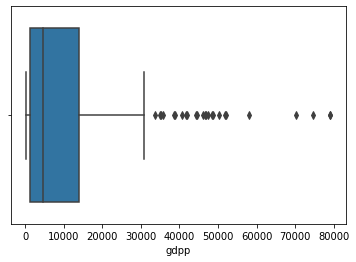

In [18]:
q1 = country['gdpp'].quantile(0.01)
q4 = country['gdpp'].quantile(0.99)
country['gdpp'][country['gdpp']>=q4] = q4
sns.boxplot(country['gdpp'])

In [19]:
q4_import = country['imports'].quantile(0.99)
country['imports'][country['imports']>=q4_import] = q4_import
q4_exports = country['exports'].quantile(0.99)
country['exports'][country['exports']>=q4_exports] = q4_exports
q4_inflation = country['inflation'].quantile(0.99)
country['inflation'][country['inflation']>=q4_inflation] = q4_inflation
q4_health = country['health'].quantile(0.99)
country['health'][country['health']>=q4_health] = q4_health
q4_total_fer = country['total_fer'].quantile(0.99)
country['total_fer'][country['total_fer']>=q4_total_fer] = q4_total_fer
q4_income = country['income'].quantile(0.99)
country['income'][country['income']>=q4_income] = q4_income
q4_life_expec = country['life_expec'].quantile(0.99)
country['life_expec'][country['life_expec']>=q4_life_expec] = q4_life_expec


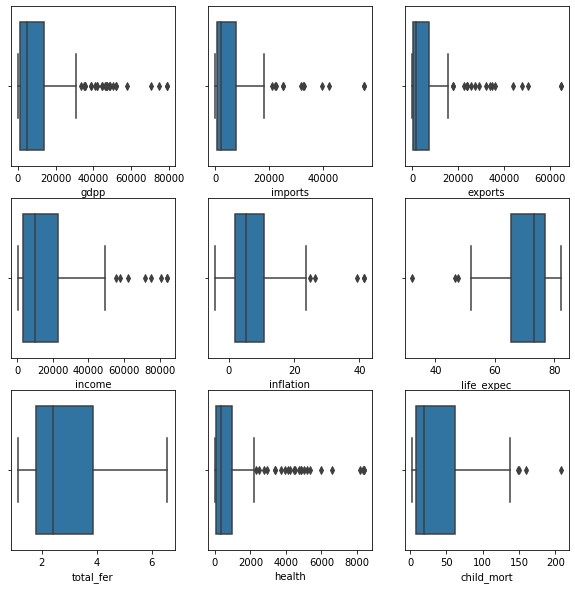

In [20]:
plt.figure(figsize = (10,10))
feature = ['gdpp', 'imports','exports','income', 'inflation','life_expec','total_fer', 'health', 'child_mort']
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(country[i[1]])

## Cluster Tendency

### Hopkins Statistics
### Before proceeding further it is important to check whether the data is suitable for clustering or not. So we will check the hopkings score for the data

In [21]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

In [22]:
hopkins(country.drop('country', axis =1))

0.9017991163474209

Since the hopkins score is more than 80%, we can say that this data is good for clustering.

## Preparing data for Modeling

### Scaling the data, will help all the features to be given equal weightage

In [23]:
### rescaling
#Scaling all other columns except country
rfm_df = country[['gdpp', 'imports','exports','income', 'inflation','life_expec','total_fer', 'health', 'child_mort']]

# instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(rfm_df)
df_scaled.shape

(167, 9)

In [24]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['gdpp', 'imports','exports','income', 'inflation','life_expec','total_fer', 'health', 'child_mort']
df_scaled.head()

,gdpp,imports,exports,income,inflation,life_expec,total_fer,health,child_mort
0,-0.702259,-0.598741,-0.569622,-0.851668,0.265002,-1.619705,1.926396,-0.566958,1.291532
1,-0.498726,-0.413584,-0.473858,-0.386946,-0.372075,0.648831,-0.865054,-0.440393,-0.538949
2,-0.477434,-0.476100,-0.424000,-0.221053,1.122161,0.671403,-0.034983,-0.486271,-0.272833
3,-0.530950,-0.463973,-0.381249,-0.612045,1.932987,-1.179541,2.153997,-0.534088,2.007808
4,-0.032042,0.139728,-0.086742,0.125254,-0.764618,0.705262,-0.543736,-0.178410,-0.695634


## Finding the Optimal Number of Clusters

### SSD
### Optimal K value using Intertia Method

Text(0.5, 1.0, 'SSD of the Clusters')

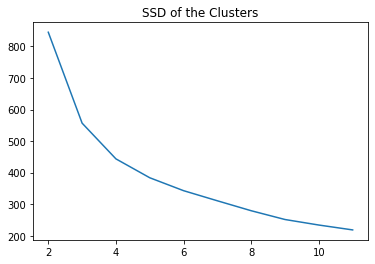

In [25]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append({'num_clusters':num_clusters,'SSD':kmeans.inertia_})

ssd_df = pd.DataFrame(ssd)
# PLot the Inertia/SSD for each n_clusters
plt.plot(ssd_df['num_clusters'],ssd_df['SSD'])
plt.title("SSD of the Clusters")

From above curve we can conclude that elbow is forming at 3 and thus we will consider 3 as the value of clusters

## SS Silhoutte Score

In [27]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46939671737315203
For n_clusters=3, the silhouette score is 0.40354315435737326
For n_clusters=4, the silhouette score is 0.3919824010221782
For n_clusters=5, the silhouette score is 0.3841728000208612
For n_clusters=6, the silhouette score is 0.297054863223934
For n_clusters=7, the silhouette score is 0.30905537718390746
For n_clusters=8, the silhouette score is 0.29496018802078094
For n_clusters=9, the silhouette score is 0.3030769348476551
For n_clusters=10, the silhouette score is 0.2828812703474432
For n_clusters=11, the silhouette score is 0.30010530038232575


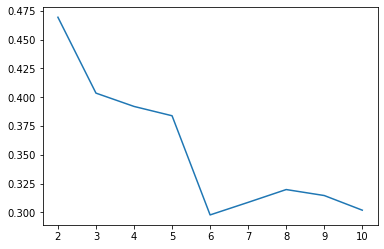

In [28]:
ss =[]
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df_scaled)
    ss.append([k, silhouette_score(df_scaled, kmean.labels_)])
temp = pd.DataFrame(ss)
plt.plot(temp[0], temp[1])

Looking at Sihouete Score, we found out that max value is achieved at k = 2, but we will not choose 2 as this is logically like dividing clusters int 2 equal parts, so we will go with next highest value that is 3.
#### As we can see that max silhouette_score is for K value two. However from analysis perspective it may not be the best choice so next higher value of K=3 looks more reasonable at this point


## Final Modeling

In [29]:
# Clustering is done for 3 clsuters
kmeans = KMeans(n_clusters=3, max_iter=50, random_state =50)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [30]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [31]:
country_copy = country.copy()

In [32]:
# assign the label
country_copy['cluster_id'] = kmeans.labels_
country_copy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [58]:
# Number of records under each cluster
country_copy.cluster_id.value_counts()

0    90
2    48
1    29
Name: cluster_id, dtype: int64

## Plotting the clusters

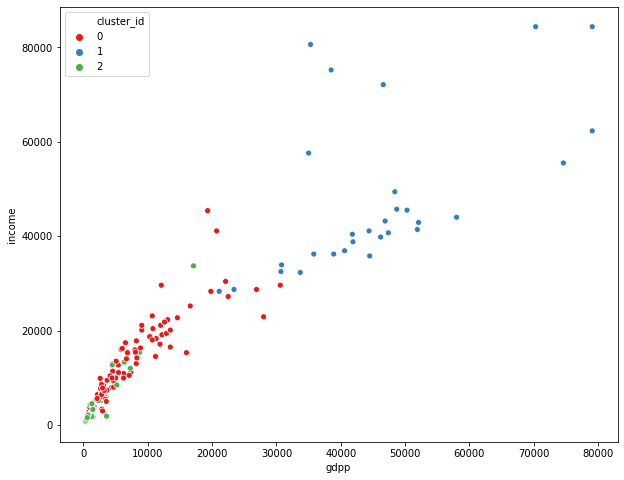

In [33]:
plt.figure(figsize=(10,8))
# Plot the cluster
sns.scatterplot(x ='gdpp', y = 'income', hue = 'cluster_id', data= country_copy,palette = 'Set1')

Here we can see that income and gdpp are directly proportional, as gdpp increases, income in that country also increases.

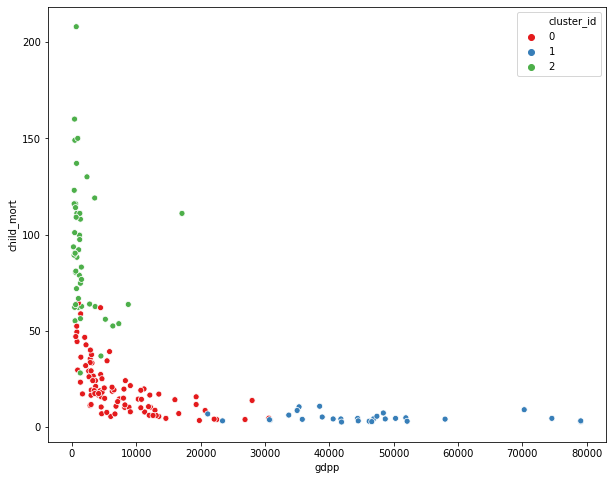

In [34]:
plt.figure(figsize=(10,8))
# Plot the cluster
sns.scatterplot(x ='gdpp', y = 'child_mort', hue = 'cluster_id', data= country_copy,palette = 'Set1')

As we can see from the above that there are 3 distinct clusters wherein the first cluster is having low gdp and high child mortality.
In second cluster we can see low child mortality but low to moderate GDPP. The third cluster is having medium to high GDP and lower child mortality.

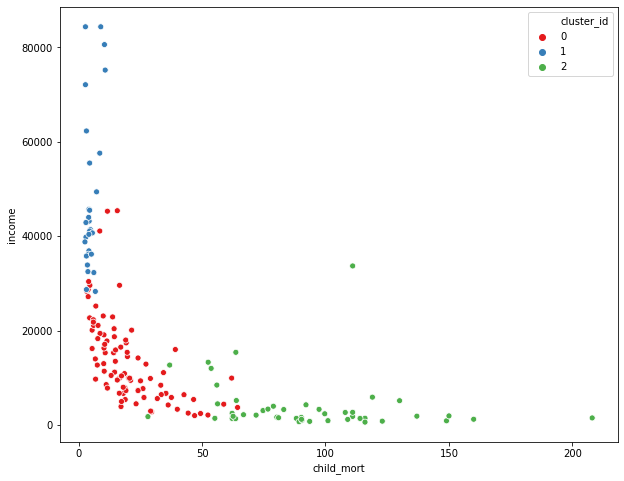

In [35]:
plt.figure(figsize=(10,8))
# Plot the cluster
sns.scatterplot(x ='child_mort', y = 'income', hue = 'cluster_id', data= country_copy,palette = 'Set1')

Here we can see that child mortality rate is inversely proportional to income. As child mortality rate is low when income is high and vice versa 

## Cluster Profilling

### Now we see the significance of each clusters

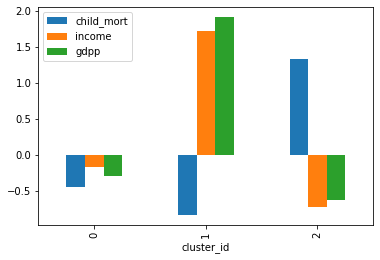

In [36]:
# Making sense out of cluster
df_scaled_copy = df_scaled[['child_mort', 'income', 'gdpp']]
df_scaled_copy['cluster_id'] = kmeans.labels_
df_scaled_copy.head()
df_scaled_copy.groupby('cluster_id').mean().plot(kind ='bar')

So from above graph we can conclude that :
    - Cluster 0 have countries which have child_mort, income and gdpp negative
    - Cluster 1 have countries with negative child_mort, and positive income and gdpp
    - Cluster 2 have countries with negative income and gdpp and positive child_mort
    
    
 So, top 5 countries that need urgent AID are countries falling in cluster label 2

In [37]:
## Finding top 5 countries that new urgent AID
country_copy[country_copy['cluster_id']== 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,2
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,2
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,2
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,2
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,2


In [38]:
country_copy[country_copy['cluster_id']== 2].sort_values(by = ['income','gdpp','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2


So, we can conclude that countries list below are the countries that needs urgent AID, based on 3 columns income, gdpp, child_mort are:
    1. Congo, Dem. Rep.
    2. Liberia
    3. Burundi
    4. Niger
    5. Central African Republic 

In [54]:
country_copy[country_copy['cluster_id']== 2].sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,2


As per the K means clustering algorithm the top 5 countries which are in dire need of assistance are- 
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

## Hierarchical Clustering

In [39]:
df_scaled.head()

,gdpp,imports,exports,income,inflation,life_expec,total_fer,health,child_mort
0,-0.702259,-0.598741,-0.569622,-0.851668,0.265002,-1.619705,1.926396,-0.566958,1.291532
1,-0.498726,-0.413584,-0.473858,-0.386946,-0.372075,0.648831,-0.865054,-0.440393,-0.538949
2,-0.477434,-0.476100,-0.424000,-0.221053,1.122161,0.671403,-0.034983,-0.486271,-0.272833
3,-0.530950,-0.463973,-0.381249,-0.612045,1.932987,-1.179541,2.153997,-0.534088,2.007808
4,-0.032042,0.139728,-0.086742,0.125254,-0.764618,0.705262,-0.543736,-0.178410,-0.695634


In [40]:
country_copy_hierarchical = country.copy()
country_copy_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


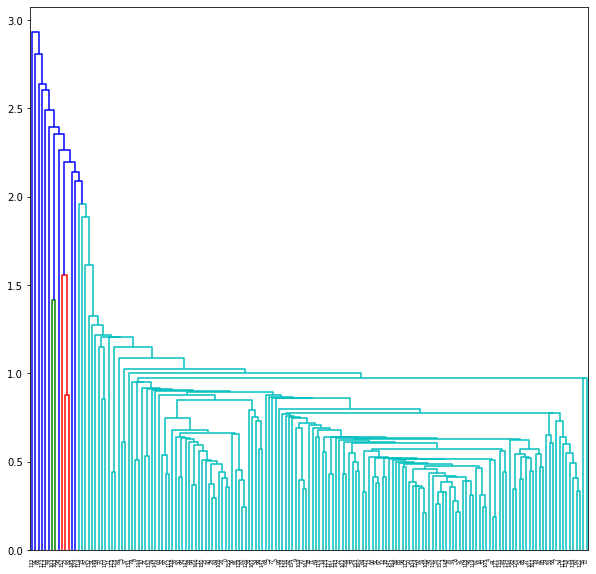

In [41]:
#First we will plot the dendogram using single linkage method
fig = plt.figure(figsize = (10,10))
mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

As we can see that with single linkage we are not able to see the levels we will now try complete linkage.

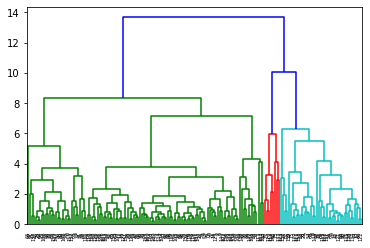

In [42]:
# complete linkage

mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

From above dendogram, we can pick number of clusters as 3 for further analysis 

In [43]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [44]:
# assign cluster labels
country_copy_hierarchical['cluster_labels'] = cluster_labels
country_copy_hierarchical.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [59]:
# Number of records under each cluster
country_copy_hierarchical.cluster_labels.value_counts()

0    118
1     41
2      8
Name: cluster_labels, dtype: int64

Cluster labels are assigned properly to each country

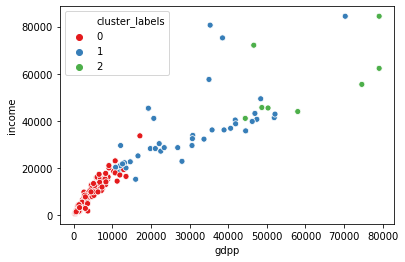

In [45]:
# Plot the cluster
sns.scatterplot(x ='gdpp', y = 'income', hue = 'cluster_labels', data= country_copy_hierarchical, palette = 'Set1')

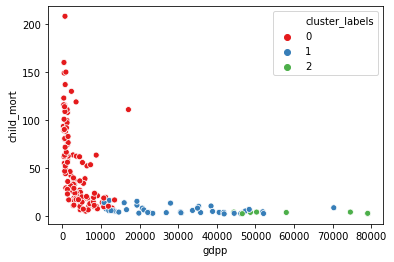

In [46]:
# Plot the cluster
sns.scatterplot(x ='gdpp', y = 'child_mort', hue = 'cluster_labels', data= country_copy_hierarchical, palette = 'Set1')

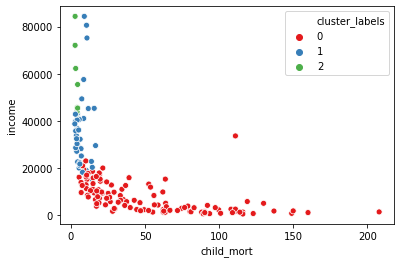

In [47]:
# Plot the cluster
sns.scatterplot(x ='child_mort', y = 'income', hue = 'cluster_labels', data= country_copy_hierarchical, palette = 'Set1')

## Cluster Profiling in Hierarchical Clustering

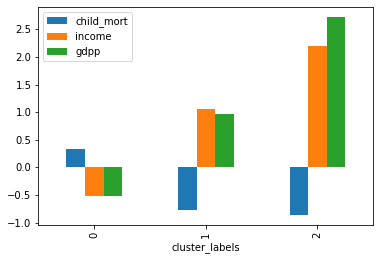

In [48]:
# Making sense ot of cluster
df_scaled_copy_hierarchical = df_scaled[['child_mort', 'income', 'gdpp']]
df_scaled_copy_hierarchical['cluster_labels'] = cluster_labels
df_scaled_copy_hierarchical.head()
df_scaled_copy_hierarchical.groupby('cluster_labels').mean().plot(kind ='bar')

So from above graph we can conclude that :
    - Cluster 0 have countries which have positive child_mort, income and gdpp negative
    - Cluster 1 have countries with negative child_mort, and positive income and gdpp
    - Cluster 2 have countries with negative child_mort, and large positive income and gdpp
    
    
 So, top 5 countries that need urgent AID are countries falling in cluster label 0

In [49]:
## Finding top 5 countries that new urgent AID
country_copy_hierarchical[country_copy_hierarchical['cluster_labels']== 0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.620,63.0,3.50,2970.0,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,41.478,75.4,2.47,13500.0,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.100,73.1,1.95,1310.0,0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.600,67.5,4.67,1310.0,0


In [50]:
country_copy_hierarchical[country_copy_hierarchical['cluster_labels']== 0].sort_values(by = ['income','gdpp','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0


So, we can conclude that countries list below are the countries that needs urgent AID :
    1. Congo, Dem. Rep.
    2. Liberia
    3. Burundi
    4. Niger
    5. Central African Republic 

In [56]:
country_copy_hierarchical[country_copy_hierarchical['cluster_labels']== 0].sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,0


As per the Hirerchichal clustering algorithm the top 5 countries which are in dire need of assistance are- 
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone